In [1]:
import treecorr
import GCRCatalogs
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
%matplotlib inline
from astropy.io import fits
import astropy.units as u
from astropy.coordinates import Angle, Latitude, Longitude
from astropy.coordinates import SkyCoord

In [2]:
filename = '/global/projecta/projectdirs/lsst/groups/CS/cosmoDC2/mass_sheets_behind_z3/cmb_maps/cmblensmap_total_gausshiz_masked.fits'

In [3]:
mapfile = hp.read_map(filename)
print(len(mapfile))

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
201326592


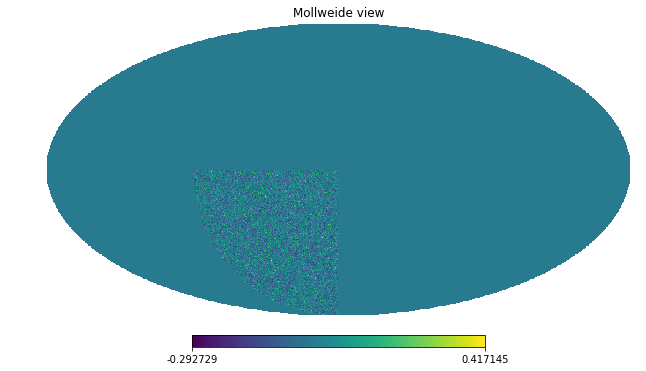

In [4]:
 hp.mollview(mapfile)

In [5]:
index = np.arange(201326592)

In [6]:
theta, phi = hp.pix2ang(nside=4096, ipix=index)
print(len(theta))

201326592


In [7]:
mask_kcmb = (phi>0)*(phi<np.pi/2)*(theta>np.pi/2)
print(True in mask_kcmb)

True


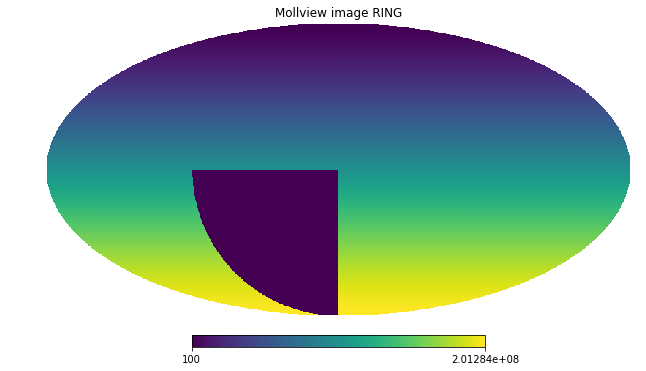

In [8]:
NPIX = 201326592
m = np.arange(NPIX)
m[mask_kcmb] = 100
hp.mollview(m, title="Mollview image RING")

Plot a map, to check if the above mask works

In [9]:
kcmb = mapfile[mask_kcmb]
ra_K = phi[mask_kcmb]
dec_K = (np.pi/2)-theta[mask_kcmb]
print(ra_K)
print(dec_K)

[3.83495197e-04 7.66990394e-04 1.15048559e-03 ... 3.92699082e-01
 1.17809725e+00 7.85398163e-01]
[-1.62760417e-04 -1.62760417e-04 -1.62760417e-04 ... -1.57039765e+00
 -1.57039765e+00 -1.57059699e+00]


In [10]:
gc = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_small')

In [12]:
data = gc.get_quantities(['ra', 'dec', 'redshift'], filters=['mag_r_lsst<28'])

In [13]:
zlo = 0.2
zhi = 0.3
mask_redshift = (data['redshift']>zlo)*(data['redshift']<zhi) #the foreground number counts

In [14]:
ra0 = data['ra'][mask_redshift]
dec0 = data['dec'][mask_redshift]
print(dec0)

[-39.03470387 -39.02967575 -39.02289191 ... -39.15142208 -39.15033602
 -39.18218801]


In [15]:
mask2 = (ra0>0)*(ra0<90)*(dec0<0)

restrict ra and dec to the region where we have Kcmb data

In [16]:
ra_N = ra0[mask2]
dec_N = dec0[mask2]

In [17]:
cat_N = treecorr.Catalog(ra=ra_N, dec=dec_N, ra_units='deg', dec_units='deg')
cat_K = treecorr.Catalog(ra=ra_K, dec=dec_K, k=kcmb, ra_units='rad', dec_units='rad')

In [18]:
nk = treecorr.NKCorrelation(nbins=20, min_sep=2.5/60/(180/np.pi), max_sep=250/60/(180/np.pi))

In [20]:
nk.process(cat_N,cat_K)       # Compute the cross-correlation function
xi = nk.xi                    # Or access the correlation function directly.
R = np.exp(nk.logr)

Text(0.5, 1.0, 'N-Kcmb Correlation between z=0.2to z=0.3')

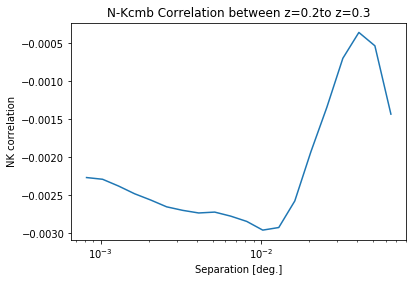

In [21]:
plt.semilogx(R, xi)
plt.xlabel('Separation [ra]')
plt.ylabel('NK correlation')
plt.title('N-Kcmb Correlation between z='+str(zlo)+'to z='+str(zhi))